In [50]:
import pandas as pd
import numpy as np
import os
import glob
import datetime as dt
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [51]:
# 单品分析所在文件夹
sku_id = 32597758635

sku_analysis_folder_path = os.path.join('D:\\Program Files (x86)\\百度云同步盘\\Dropbox\\-E·J- 2014.5.1\\2016.12.15 店小秘数据分析\\2021.8.29 单品分析',
                                       str(sku_id))

In [52]:
# 遍历文件夹内的文件
excel_files = glob.glob(os.path.join(sku_analysis_folder_path, "*.xlsx"))

df_sku_analysis_file_list = []

# loop over the list of csv files
for f in excel_files:
      
    if '单品分析-核心指标' in f:
        # read the csv file
        df_sku_analysis_file = pd.read_excel(f)

        # print the location and filename
        # print('Location:', f)
        # print('File Name:', f.split("\\")[-1])

        # print the content
        # print('Content:')
        # display(df)
        # print()
        df_sku_analysis_file_list.append(df_sku_analysis_file)
    
df_sku_analysis_file_merge = pd.concat(df_sku_analysis_file_list)
df_sku_analysis_file_merge.head()

,商品id,商品标题,税费,统计时间,商品加购人数,访客数,支付买家数,支付老买家,商品收藏人数,支付商品件数,...,搜索曝光量,下单主订单数,下单商品件数,下单买家数,成功退款金额,下单转化率,支付转化率,客单价,支付件单价,UV价值
0,32597758635,19V 4.74A 90W Universal Power Adapter Charger ...,0.0,2021-02-28,24,249,9,0,6,11,...,5393,9,11,9,0.00,0.0361,0.0361,16.46,13.47,59.50
1,32597758635,19V 4.74A 90W Universal Power Adapter Charger ...,0.0,2021-02-27,27,237,7,0,11,10,...,5005,7,10,7,12.71,0.0295,0.0295,18.66,13.06,55.11
2,32597758635,19V 4.74A 90W Universal Power Adapter Charger ...,0.0,2021-02-26,26,244,12,1,8,14,...,4815,14,16,14,0.00,0.0574,0.0492,15.84,13.58,77.89
3,32597758635,19V 4.74A 90W Universal Power Adapter Charger ...,0.0,2021-02-25,39,240,11,0,8,12,...,4622,10,12,10,12.54,0.0417,0.0458,15.87,14.55,72.75
4,32597758635,19V 4.74A 90W Universal Power Adapter Charger ...,0.0,2021-02-24,25,206,5,0,6,5,...,3941,6,6,6,13.00,0.0291,0.0243,13.94,13.94,33.84


In [63]:
# 补充字段
df_sku_analysis_file_merge['客单价'] = df_sku_analysis_file_merge['支付金额'] / df_sku_analysis_file_merge['支付主订单数']
df_sku_analysis_file_merge['搜索曝光->访客%'] = df_sku_analysis_file_merge['访客数'] / df_sku_analysis_file_merge['搜索曝光量']
df_sku_analysis_file_merge['访客->下单%'] = df_sku_analysis_file_merge['下单买家数'] / df_sku_analysis_file_merge['访客数']
df_sku_analysis_file_merge['下单->支付%'] = df_sku_analysis_file_merge['支付买家数'] / df_sku_analysis_file_merge['下单买家数']
df_sku_analysis_file_merge['搜索曝光->支付%'] = df_sku_analysis_file_merge['支付买家数'] / df_sku_analysis_file_merge['搜索曝光量']

In [64]:
df_sku_analysis_file_merge.columns

Index(['商品id', '商品标题', '税费', '统计时间', '商品加购人数', '访客数', '支付买家数', '支付老买家',
       '商品收藏人数', '支付商品件数', '搜索点击率', '浏览量', '下单金额', '支付金额', '平均停留时长', '老访客数',
       '支付新买家', '支付主订单数', '新访客数', '搜索曝光量', '下单主订单数', '下单商品件数', '下单买家数',
       '成功退款金额', '下单转化率', '支付转化率', '客单价', '支付件单价', 'UV价值', '搜索曝光->访客%',
       '访客->下单%', '下单->支付%', '搜索曝光->支付%'],
      dtype='object')

In [65]:
# 转换格式
# df_sku_analysis_file_merge['统计时间'] = df_sku_analysis_file_merge['统计时间'].dt.date

In [66]:
# 访客
df_sku_analysis_file_merge.groupby(['统计时间']).agg({'访客数': 'sum', '支付件单价': 'sum'}).reset_index().plot(kind='line', x='统计时间', y=['访客数', '支付件单价'], secondary_y = ['支付件单价'])

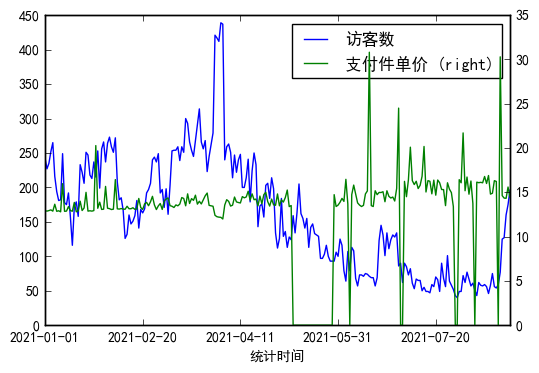

In [67]:
plt.show()

In [68]:
# 搜索曝光
df_sku_analysis_file_merge.groupby(['统计时间']).agg({'访客数': 'sum', '搜索曝光量': 'sum'}).reset_index().plot(kind='line', x='统计时间', y=['访客数', '搜索曝光量'], secondary_y = ['搜索曝光量'])

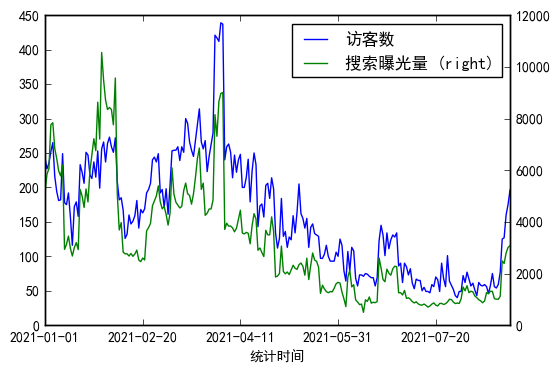

In [69]:
plt.show()

In [70]:
# 搜索曝光 & 转化率
df_sku_analysis_file_merge.groupby(['统计时间']).agg({'搜索曝光->访客%': 'sum', '搜索曝光量': 'sum'}).reset_index().plot(kind='line', x='统计时间', y=['搜索曝光->访客%', '搜索曝光量'], secondary_y = ['搜索曝光->访客%'])

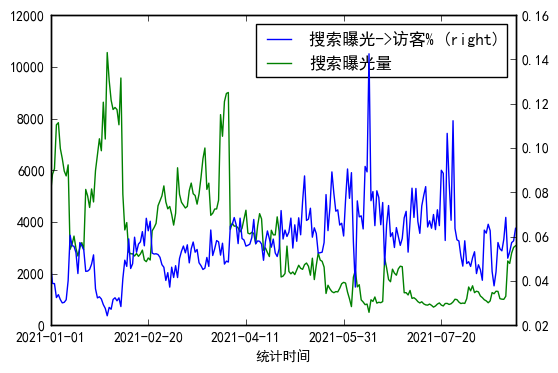

In [71]:
plt.show()

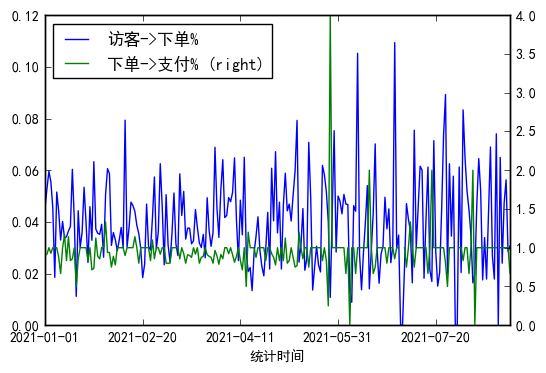

In [74]:
# 各级转化
df_sku_analysis_file_merge.groupby(['统计时间']).agg({'访客->下单%': 'sum', '下单->支付%': 'sum'}).reset_index().plot(kind='line', x='统计时间', y=['访客->下单%', '下单->支付%'], secondary_y = ['下单->支付%'])
plt.show()

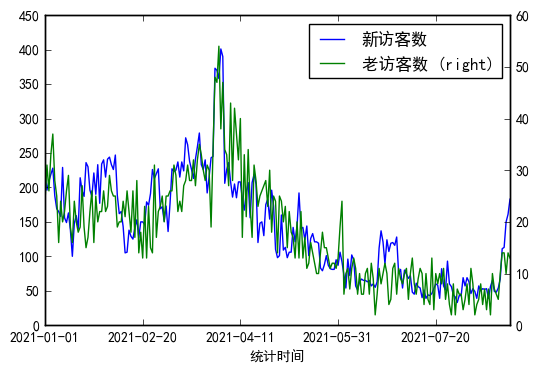

In [73]:
# 新老访客
df_sku_analysis_file_merge.groupby(['统计时间']).agg({'新访客数': 'sum', '老访客数': 'sum'}).reset_index().plot(kind='line', x='统计时间', y=['新访客数', '老访客数'], secondary_y = ['老访客数'])
plt.show()